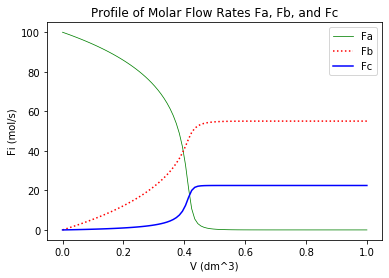

In [2]:
"""
   CHE 5753 – Applied Numerical Computing for Scientists and Engineers
               *Computational Assignment 3: ODE Solver*
______________________________________________________________________%
 Created by: Haden Kolmer
             Oklahoma State University
             Petroleum Engineering Master's
             haden.kolmer@okstate.edu (please Email for issues or
                                           suggestions)
_________________________________________________________________________%
% Problem %%
 This assignment has two parts: 1.) generate a Python file and
 2.) document using Jupyter creating a .ipynb file. The goal for the
 assignment is to solve a series of ODEs from a given equation sheet and
 given initial conditions to produce the required plots.

"""

# ---------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Defining parameter values
Vspan = np.linspace(0, 1, num=100)  # Volumetric interval between 0 and 1 (dm^3)
V1 = 0  # initial volume (dm^3)
T = 423  # Temperature (degree Kelvin)
Fa = 100
Fb = 0
Fc = 0

# Defining constant values
T0 = 423  # initial Temperature (degree Kelvin)
Ct0 = 0.1  # J / mol
Cpa = 90  # J / mol
Cpb = 90  # J / mol
Cpc = 180  # J / mol
Ua = 4000  # J / (m^3*s*C)
Ta = 373  # Fed Temperature (degree Celsius)
E1overR = 4000  # Kelvin
E2overR = 9000  # Kelvin
Hr1a = -20000  # J / (mol of A reacted in reaction 1)
Hr2a = -60000  # J / (mol of A reacted in reaction 2)

# ---------------------------------------------------------------------------


# defining parameters and initial conditions in matrix form
ic = np.array([T, Fa, Fb, Fc])
para = (T0, E1overR, E2overR, Ct0, Cpa, Cpb, Cpc, Ta, Hr1a, Hr2a)


# ---------------------------------------------------------------------------

def ODEs_CA3(initial_conditions, V, para):

    #parameter locations in Parameter matrix
    T0 = para[0]
    E1overR = para[1]
    E2overR = para[2]
    Ct0 = para[3]
    Cpa = para[4]
    Cpb = para[5]
    Cpc = para[6]
    Ta = para[7]
    Hr1a = para[8]
    Hr2a = para[9]

    #initial conditions values and locations
    [T, Fa, Fb, Fc] = initial_conditions

    # Stoichiometry E12-5.10 thru 5.12
    Ft = Fa + Fb + Fc
    Ca = Ct0 * (Fa / Ft) * (T0 / T)
    Cb = Ct0 * (Fb / Ft) * (T0 / T)
    Cc = Ct0 * (Fc / Ft) * (T0 / T)

    # k1 and k2 equations
    k1a = 10 * np.exp(E1overR * ((1 / 300) - (1 / T)))  # s^-1
    k2a = 0.09 * np.exp(E2overR * ((1 / 300) - (1 / T)))  # dm^3 / (mol*s)

    # Rate Laws E12-5.1 thru 5.2
    r1a = -k1a * Ca
    r2a = -k2a * (Ca ** 2)

    # Net Rates E12-5.7 thru 5.9
    ra = r1a + r2a
    rb = k1a * Ca
    rc = 0.5 * k2a * (Ca ** 2)

    # Mole balances
    dFadV = ra  # molar flow rate of sample A [mol/s]
    dFbdV = rb  # molar flow rate of sample B [mol/s]
    dFcdV = rc  # molar flow rate of sample C [mol/s]

    # PFR Energy balance E12-5.3
    dTdV = (Ua * (Ta - T) + (-r1a * -Hr1a) + (-r2a * -Hr2a)) / (Fa * Cpa + Fb * Cpb + Fc * Cpc)

    # returned values for plotting
    return [dTdV, dFadV, dFbdV, dFcdV]


# using odeint to find the solutions of the ODE using initial conditions, Vspan, and parameters
output = odeint(ODEs_CA3, ic, Vspan, args=(para,))

# Figures
# plot for the temperature profile Figure E12-5.1
plt.figure(1)
plt.plot(Vspan, output[:, 0], 'k', label='Temperature', linestyle='--')
plt.title("Temperature Profile")
plt.xlabel("V (dm^3)")
plt.ylabel("T (K)")
plt.legend(loc="upper right")
plt.show()

# plot for the molar flow rates Figure E12-5.2
plt.figure(2)
plt.plot(Vspan, output[:, 1], 'g', label='Fa', linestyle='-', linewidth=0.75)
plt.plot(Vspan, output[:, 2], 'r', label='Fb', linestyle=':')
plt.plot(Vspan, output[:, 3], 'b', label='Fc', linestyle='-')
plt.title("Profile of Molar Flow Rates Fa, Fb, and Fc")
plt.xlabel("V (dm^3)")
plt.ylabel("Fi (mol/s)")
plt.legend(loc="upper right")
plt.show()